In [1]:
## import required packages for a parameter estimation technique

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd
import math


##Import Experimental Data:
    
rev_exp_data = pd.read_csv("data/10mVs_Reversible.csv")
current_exp=rev_exp_data['current(A)'].values
voltage_exp=rev_exp_data['voltage(mV)'].values
time_exp=rev_exp_data['time(s)'].values

## all appropriate packages and the singular experimental data file is imported now



What is the Voltage sweep rate in mV/s?(10) 500
What is the electrode surface area in cm^2?(.2) 1
What is the initial concentration in mol/cm^3?(.00001) 1
What is the temperature in K?(298) 298
What is the equilibrium potential in V?(.10) .1


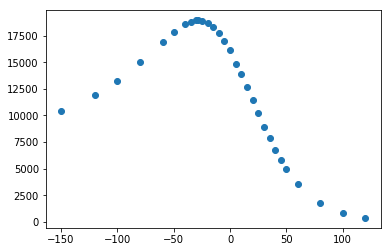

In [2]:
# Import the dimensionless voltammagram (V I) for reversible reactions

rev_dim_values = pd.read_csv("data/dimensionless_values_rev.csv")
rev_dim_current=rev_dim_values['dimensionless_current'].values
rev_dim_voltage=rev_dim_values['dimensionless_Voltage'].values

##We will now prompt the user to submit known parameters (THESE CAN BE CHANGED OR MADE MORE CONVENIENT)
sweep_rate= float(input("What is the Voltage sweep rate in mV/s?(10)"))
electrode_surface_area= float(input("What is the electrode surface area in cm^2?(.2)"))
concentration_initial= float(input("What is the initial concentration in mol/cm^3?(.00001)"))
Temp= float(input("What is the temperature in K?(298)"))
eq_pot= float(input("What is the equilibrium potential in V?(.10)"))

##we are inserting a diffusion coefficient to check math here, we will estimate this later:
Diff_coeff=0.00001

## Here we define constant variables, these can be made to user inputs if needed.
n=1
Faradays_const=96285
R_const=8.314
sigma=(n*Faradays_const*sweep_rate)/(R_const*Temp)
Pre=electrode_surface_area*concentration_initial*n*Faradays_const*math.sqrt(Diff_coeff*sigma)

output_voltage=(eq_pot+rev_dim_voltage/n)
output_current=Pre*rev_dim_current

plt.scatter(output_voltage,output_current)


In [3]:
print(output_current)

[  381.99028832   848.86730737  1782.62134549  3565.24269097
  4965.87374814  5857.18442088  6790.93845899  7852.02259321
  8955.5500928  10186.40768849 11417.26528418 12648.12287988
 13921.42384094 14855.17787905 16128.47884011 16977.34614748
 17741.32672412 18335.53383928 18717.5241276  18887.29758908
 18942.47396406 18929.74095444 18759.96749297 18590.1940315
 17868.65682023 16934.90278212 14982.50797515 13242.32999504
 11884.14230324 10398.62451533]


In [4]:
print(rev_dim_current)

[0.009  0.02   0.042  0.084  0.117  0.138  0.16   0.185  0.211  0.24
 0.269  0.298  0.328  0.35   0.38   0.4    0.418  0.432  0.441  0.445
 0.4463 0.446  0.442  0.438  0.421  0.399  0.353  0.312  0.28   0.245 ]


In [5]:
from scipy import optimize

def test_func(rev_dim_current, D):
    return electrode_surface_area*concentration_initial*n*Faradays_const*math.sqrt(D*sigma)*rev_dim_current

params, params_covariance = optimize.curve_fit(test_func, rev_dim_current, output_current,p0=None,bounds = (0,[1]))

print(params)

[1.e-05]
